# Monte Carlo

## What is a Monte Carlo Simulation?

Per [IBM](https://www.ibm.com/think/topics/monte-carlo-simulation), a Monte Carlo simulation is "a mathematical technique that is used to estimate the possible outcomes of an uncertain event."

## Okay? But what does that mean?

An example that I like and came up in my own research was to find the uncertainty in surface velocity of Helheim Glacier, Greenland using terristrial laser scanners

![Schematic of velocity uncertainty from Helheim Glacier point cloud](pc_error_1-1.png)

Since there is uncertainity in the position of the points scanned, we can perform a lot of simulations to see the possible areas where the feature was tracked

## Lets visualize a single scenario
Image is from the *Fundamentals of Glacier Dynamics*

![alt text](VDV_vel_error.png)

## Who cares about glacier velocity, is there a more general example?

This same logic can also be applied to the GPS in our phones

![alt text](google_maps.jpg)

## Main Objectives 
1) Find the uncertainty in velocity using a monte carlo simulation
2) Use Numpy and Matplotlib for the simulation
3) Learn more about functions in python
4) Experiment with different parameters

## Python Concepts We Will Use

* [np.random](https://numpy.org/doc/2.1/reference/random/index.html)
    * [np.random.uniform](https://numpy.org/doc/2.2/reference/random/generated/numpy.random.uniform.html)
        * random.uniform(low=0.0, high=1.0, size=None)
    * [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)
        * random.choice(a, size=None, replace=True, p=None)
* [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
    * Return evenly spaced numbers over a specified interval
    * numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
* [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
    * plotting a histogram with matplotlib 

## What is a Uniform Distribution?

Probability Density Function (PDF) of a Continuous Uniform Distribution: \
$$\Large f(x) = \frac{1}{b-a} $$

**a** is the lower bound of your interval and **b** is the upper bound

Let's visualize what the PDF of a uniform distribtion looks like. First, import our favorite libraries

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

This `np.where` statement is very useful. The first arguement is the condition, the second is where the first condition is true, replace the value in the array with the number in the second position. The last argument is when the condition is false, replace the value in the array with the specified number. \
So in our case, we create an array called **x** which is 1000 linearly spaced values from 0 to 7. These are the values on our x-axis. To find the y values, we use the `uniform_pdf` function.


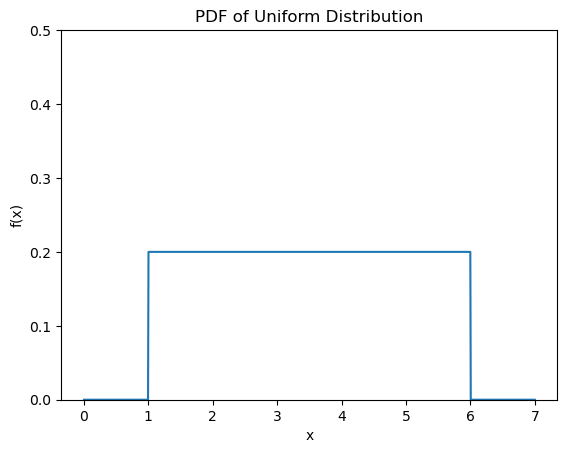

In [14]:
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

x = np.linspace(0, 7, 1000)
y = uniform_pdf(x, 1, 6)

plt.plot(x, y)
plt.title('PDF of Uniform Distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 0.5)
plt.show()

## Back to our velocity uncertainty problem!

### What do we need?

**Conceptually**
1) The radius for our uncertainty
2) Number of samples we want to sample within that radius

**Programmatically**
1) A function to generate random samples within a circle
2) Visualize the samples and distribution of velocity simulations 

In [15]:
def circle_sample(n_samples, r, x_off=0, y_off=0):
    """
    Randomly sample locations within a circle from a uniform probability distribution 
    Inspired by this stack overflow response https://stackoverflow.com/questions/61401747/random-function-in-python-to-generate-random-pair-inside-a-circle

        Parameters
    ----------
    n_samples : int
        Number of samples to take
    r : float
        Error radius of circle
    x_off : float, default 0
        offset in x direction. 
        How far the feature moved in the x direction.
    y_off : float, default 0 
        offset in y direction. 
        How far the feature moved in the y direction.
        
        Returns
    -------
    x_point : np.ndarray
        array of x coordinates of a randomly generated points in a circle with size = n_samples
    y_point : np.ndarray
        array of y coordinates of a randomly generated points in a circle with size = n_samples
    x_circ : np.ndarray
        array of x coordinates of a a circle with size = n_samples
    y_circ : np.ndarray
        array of y coordinates of a a circle with size = n_samples
    """
    
    # make a unit circle 
    # convert from polar (r, theta) to cartesian (x, y)
    theta = np.linspace(0, 2*np.pi, n_samples)
    
    # xy of a circle
    x_circ = r * np.cos(theta) + x_off # scale with x offset
    y_circ = r * np.sin(theta) + y_off # scale with y offset

    # get random numbers from uniform distribution
    t = np.random.uniform(0, 1, size=n_samples)
    u = np.random.uniform(0, 1, size=n_samples)

    # Caution from picking random variables in a uniform distribution within a circle
    # https://mathworld.wolfram.com/DiskPointPicking.html
    # a good explanation of the problem is here https://apps.dtic.mil/sti/pdfs/ADA626479.pdf
    x_point = (r*np.sqrt(t) * np.cos(2*np.pi*u)) + x_off
    y_point = (r*np.sqrt(t) * np.sin(2*np.pi*u)) + y_off
    

    return x_point, y_point, x_circ, y_circ    

In [65]:
def circle_plot(x_point, y_point, x_circ, y_circ, x_off=0, y_off=0):
    """
    Plot results from circle_sample function

        Parameters
    ----------
    x_point : np.ndarray
        array of x coordinates of a randomly generated points in a circle with size = n_samples
    y_point : np.ndarray
        array of y coordinates of a randomly generated points in a circle with size = n_samples
    x_circ : np.ndarray
        array of x coordinates of a a circle with size = n_samples
    y_circ : np.ndarray
        array of y coordinates of a a circle with size = n_samples
        
        Return
    -------
        None
    """
    plt.figure(figsize=(7,7))
    # plot the circle
    plt.plot(x_circ, y_circ, linestyle='-', linewidth=2, label='Circle', color='red') # default plt.plot plots line 
    # plot the points
    plt.scatter(x_point, y_point, marker='o',  label='Samples')

    plt.xlabel('meters')
    plt.ylabel('meters')
    plt.grid()
    plt.legend(loc='upper right')
    plt.show(block=True)

## Sample With Caution!

![alt text](bias_points.png)

![alt text](correct_method.png)

## Now let's use these functions!

In [60]:
n_samples = int(1e3) # number of samples to take within our uncertainty radius
r = 5.0 # our uncertainty radius in meters

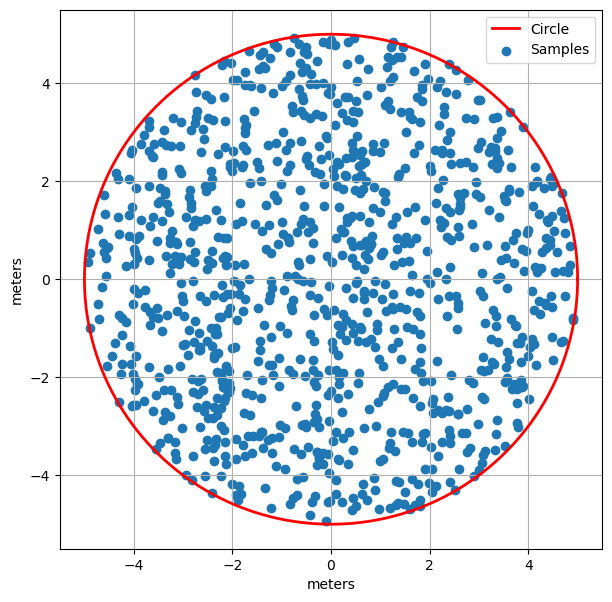

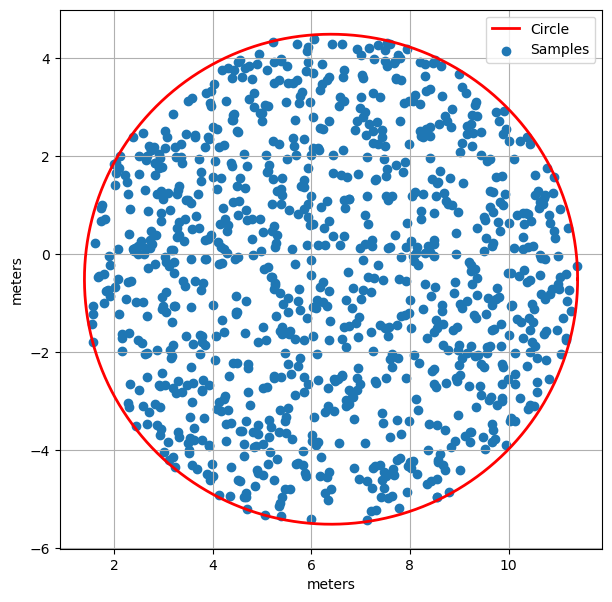

In [61]:
x1, y1, a1, b1 = circle_sample(n_samples, r)
circle_plot(x1, y1, a1, b1)

# add an offset to simulate the feature moving some distance
x2, y2, a2, b2 = circle_sample(n_samples, r, x_off=6.4, y_off=-0.52)
circle_plot(x2, y2, a2, b2)

## Now we have simulated two positions. How do we calculate the uncertainty in velocity? 

Text(0.5, 1.0, 'Velocity Error Probability')

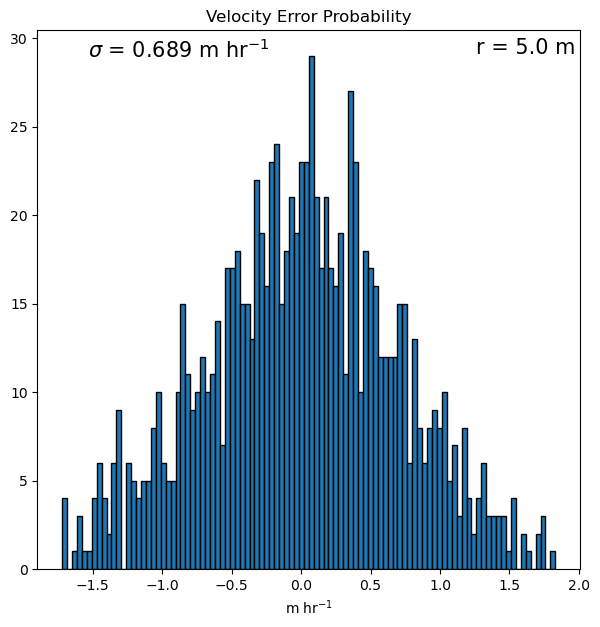

In [58]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

# Postion Error
# Mix up the scatter points and then calculate the difference between them
random_x1 = np.random.choice(x1, size=(int(n_samples), 1))
random_x2 = np.random.choice(x2, size=(int(n_samples), 1))

# We need to make up the time it took to move from position one to position 2
time_delta = 5.0 #hours

velocity_arr = ((random_x2-random_x1)/time_delta) #units meters / hour
velocity_arr_res = velocity_arr - np.mean(velocity_arr) # center around zero

ax.hist(velocity_arr_res, bins=100, edgecolor='black')
vel_unit = r'm hr$^{-1}$'

ax.set_xlabel(vel_unit)
sigma = np.std(velocity_arr_res)
sigma_txt = r'$\sigma$'
ax.text(0.0, .95, f'{sigma_txt} = {sigma:.3f} {vel_unit}', transform=hist_plot.transAxes, size=15, va='top', ha='left')
ax.text(0.90, .95, f'r = {r} m', transform=hist_plot.transAxes, size=15, va='top', ha='right')
ax.set_title('Velocity Error Probability')

## Results! Congrats

So from this example we see that that the velocity has a one standard deviation uncertainty of 0.689 m hr$^{-1}$ using a radius of 5 m.

Let's experiment with different values for the `n_samples`, `r`, and whatever variable you want to change!

## Another Example?

In [67]:
# From https://medium.com/@whystudying/monte-carlo-simulation-with-python-13e09731d500
# initialize variables
# n_simulations = 100000
# n_points_circle = 0
# n_points_square = 0

# # create lists to store x and y values
# l_xs = []
# l_ys = []

# # loop n_simulations times
# for _ in range(n_simulations):
    
#     # x is randomly drawn from a continuous uniform distritbuion
#     x = np.random.uniform(-1, 1)
#     # store x in the list
#     l_xs.append(x)
    
#     # y is randomly drawn from a continuous uniform distribution
#     y = np.random.uniform(-1, 1)
#     # store y in the list
#     l_ys.append(y)
    
# # loop n_simulations times
# for i in range(n_simulations):
    
#     # calculate the distance between the point and the origin
#     dist_from_origin = l_xs[i] ** 2 + l_ys[i] ** 2
    
#     # if the distance is smaller than or equal to 1, the point is in the circle
#     if dist_from_origin <= 1:
#         n_points_circle += 1
    
#     # by definition of the uniform distribution, the point is in the square
#     n_points_square += 1
    
# # estimate the value of pi
# pi = 4 * n_points_circle / n_points_square
# print(pi)

3.14384


# Additional Resources and Libraries 

* [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_monte_carlo_simulation.html)
    * An online textbook with lots of interactive examples
* [Cupy](https://cupy.dev/)
    * Numpy but for Graphics Processing Units (GPU). If you have a NVIDIA GPU and need very efficient code. 

![Cupy](cupy.png)